# k-Means clustering example: mall customer segmentation
### Adopted from https://github.com/sametgirgin/Machine-Learning-Clustering-Models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/scsu-data-science/mall_customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Create clusters based on annual income and speding score

In [ ]:
# Select the annual income and the spending score columns  
X = df.loc[:, ['Annual Income (k$)','Spending Score (1-100)']].values

# Apply k-Means using K = 1-10 clusters, and save the within cluster sum of squares, wcss (error)

In [ ]:
wcss = []
for k in range(1,11): 
     kmeans = KMeans(n_clusters = k, random_state = 0)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

# Elbow plot to determine good choice of k

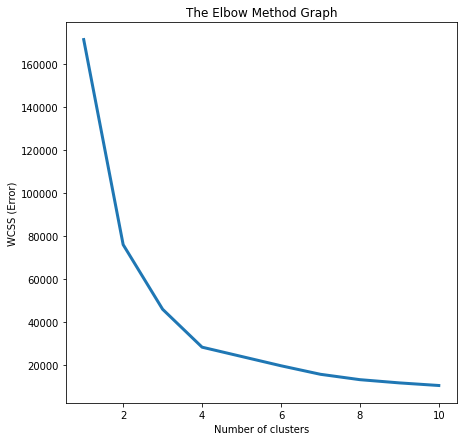

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(range(1,11), wcss, linewidth = 3)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Error)')
plt.show()

# Plot the clusters

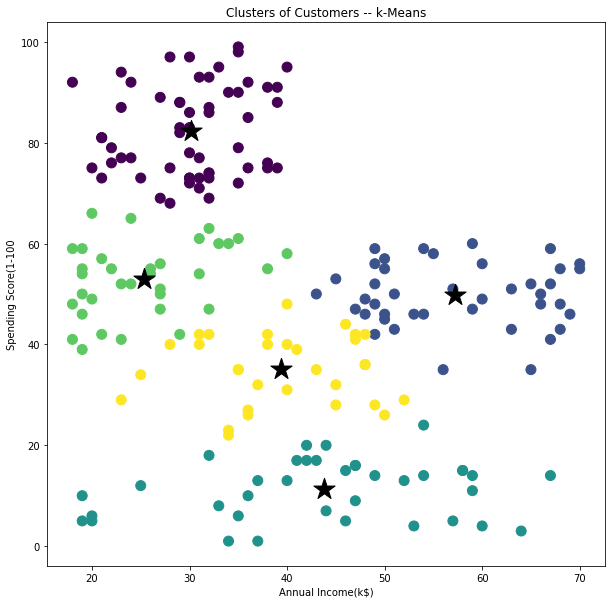

In [ ]:
kmeans = KMeans(n_clusters=5, init ='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

# Plot the centroids
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 500, 
            c = 'black')

plt.title('Clusters of Customers -- k-Means')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

# Perform the same analysis using age and spending score instead

In [ ]:
X = df.loc[:, ['Age','Spending Score (1-100)']].values

In [ ]:
wcss = []
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

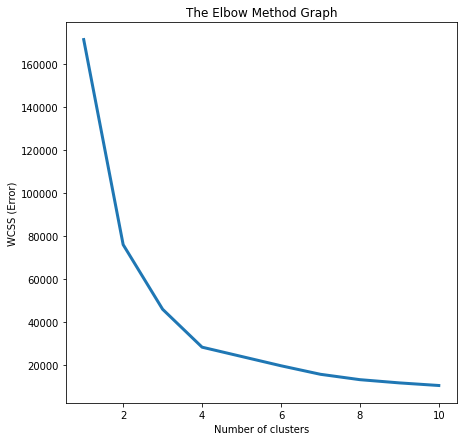

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(range(1,11), wcss, linewidth=3)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Error)')
plt.show()

# 4 clusters are appropriate in this case


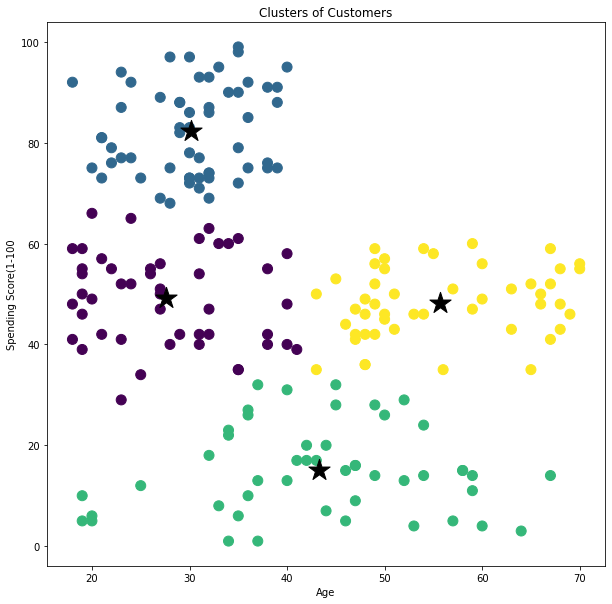

In [ ]:
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=0 )
y_kmeans = kmeans.fit_predict(X)

plt.rcParams["figure.figsize"] = (10,10)
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s = 500, 
            c = 'black',
            marker ='*')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100')
plt.show()